# Ad Click-Through Rate Forecasting
___

<a id="cont"></a>
_______________________________________________________________________________________________________________________________

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing packages</a>

<a href=#three>3. Loading the data</a>

<a href=#four>4.  Exploratory Data Analysis</a>

<a href=#five>5. Forecasting</a>

<a href=#six>6.  Conclusion</a>


<a id="one"></a>
# 1) Introduction
<a href=#cont>Back to Table of Contents</a>

___

The technique of calculating the rate at which users click on an advertisement's link to visit the advertiser's website-known as ads click-through rate analysis - allows one to assess the impact of online advertisement

**Purpose of ads CRT analysis**:
  1. **Optimizing Ad Campaigns**: By predicting CTR, advertisers can optimize their campaigns for better perfomance, targeting adjustments and budgeting decisions.
  2. **Budget Allocation**: Helps in deciding how much budget to allocate to different ads based on their expected performance.
  3. **Performance Evaluation**: Provides a benchmark for evaluating the effectiveness of different ads or campaigns.

In this project, we want to build a forecasting model to predict future CTR values. In the sections below, I will take you through the task of building this model.

 <a id="two"></a>
## 2. Importing Packages

Let’s get started with the task of Ads CTR Analysis and forecasting by importing the necessary Python libraries

<a href=#cont>Back to Table of Contents</a>

In [1]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import datetime
import kaleido
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'png'
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>

In this section we will load the csv file into a DataFrame.  We will be using Pandas python package to read the csv file from our local computer.

Headers for the file are shown below:

|**Header**|**Description**|
|-|-|
|Date| The date on which the data was recorded|
|Clicks| The number of time users clicked on the ads|
|Impressions|	The total number of times the ads were displayed to users|

<a href=#cont>Back to Table of Contents</a>

In [18]:
df = pd.read_csv('ctr.csv')
df.head()

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999


In [19]:
df.tail()

,Date,Clicks,Impressions
360,2023-10-14,885,28487
361,2023-10-15,1180,33440
362,2023-10-16,1624,41688
363,2023-10-17,1751,40957
364,2023-10-18,1573,40351


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>

In this section, we will perform an in-depth analysis of the features in the dataset. EDA will help us look at the data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the features.

<a href=#cont>Back to Table of Contents</a>

In [20]:
df.shape

(365, 3)

In [21]:
print("Rows   :" , df.shape[0])
print("Columns:", df.shape[1])

Rows   : 365
Columns: 3


Looking at the shape of the data, we can see that the data has 365 rows and 3 columns. Now, let's take a look at the data types in the dataset using `pd.info()` to get a more info about our dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Clicks       365 non-null    int64 
 2   Impressions  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [23]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print( "Categorical Variables:", len(object_cols))

int = (df.dtypes == 'int64')
num_cols = list(int[int].index)
print( "Integer Variables:", len(num_cols))

float = (df.dtypes == 'float64')
float_cols = list(float[float].index)
print( "Float Variables:", len(float_cols))

Categorical Variables: 1
Integer Variables: 2
Float Variables: 0


As we can see our dataset has one categorical variable and two integer variables. It also looks like our dataset has no missing values, but we still have to check that just to be sure.


Next, we need to identify if our dataset has columns which contains a single value. This is because columns that have single observation or value are not that useful when we want to be our model.

In [24]:
print('\nUnique values : \n', df.nunique())


Unique values : 
 Date           365
Clicks         333
Impressions    361
dtype: int64


We can see that our dataset has no such columns.

In [25]:
# Looking at the descriptive statistics of the dataset
df.describe()

,Clicks,Impressions
count,365.000000,365.000000
mean,2070.372603,49612.717808
std,652.136850,9894.719622
min,816.000000,26489.000000
25%,1604.000000,41999.000000
50%,1948.000000,48428.000000
75%,2553.000000,57326.000000
max,3720.000000,72052.000000


In [26]:
# Check if the data has null values
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

Date           0.0
Clicks         0.0
Impressions    0.0
dtype: float64

Our dataset has no missing values. Now, lets convert our date column in the dataset from a string/object to a datetime format and then setting it as an index of the DataFrame

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

Now, let's visualize the clicks and impressions over time

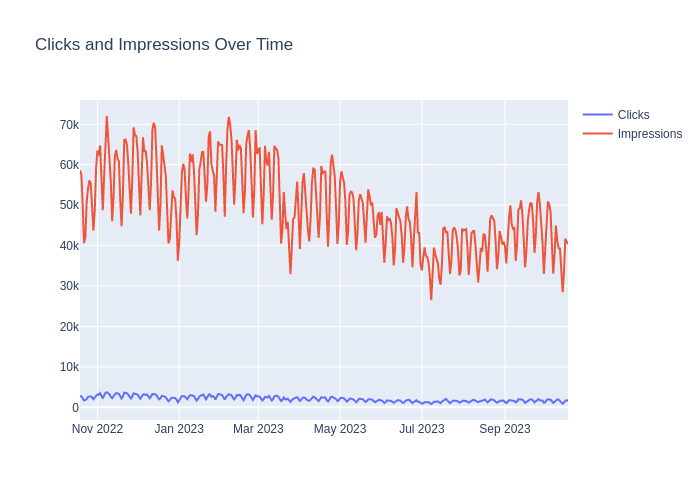

In [28]:
# Visualize clicks and impressions
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Clicks'], mode= 'lines', name='Clicks'))
fig.add_trace(go.Scatter(x=df.index, y=df['Impressions'], mode= 'lines', name='Impressions'))
fig.update_layout(title='Clicks and Impressions Over Time')# xaxis_title='Date', yaxis_title='Number of Impressions')
fig.show()

Now, let's have a look at the relationship between clicks and impressions

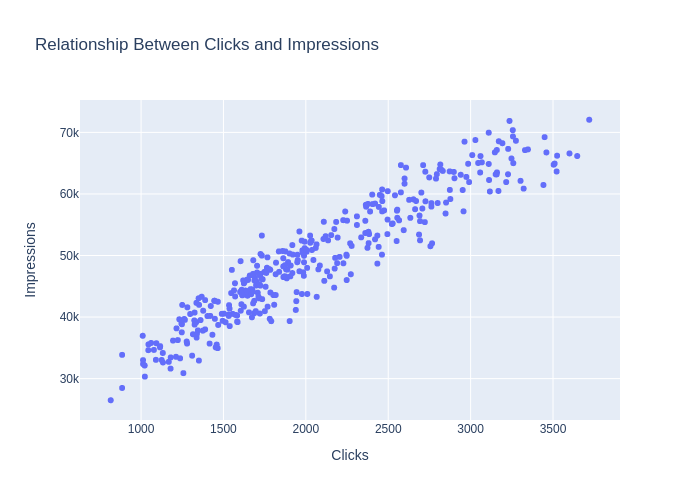

In [29]:
# Create a scatter plot to visualize the relationship between clicks and impressions
fig = px.scatter(df, x='Clicks', y='Impressions', title='Relationship Between Clicks and Impressions ',
                 labels={'Clicks': 'Clicks', 'Impressions': 'Impressions'})

# Customize the layout
fig.update_layout(xaxis_title='Clicks', yaxis_title='Impressions')

# Show the plot
fig.show()

According to the figure above, clicks and impressions have a linear relationship. In other words, more ad impressions translate into more ad clicks. Now, let's calculate and visualize the ads CTR over time.

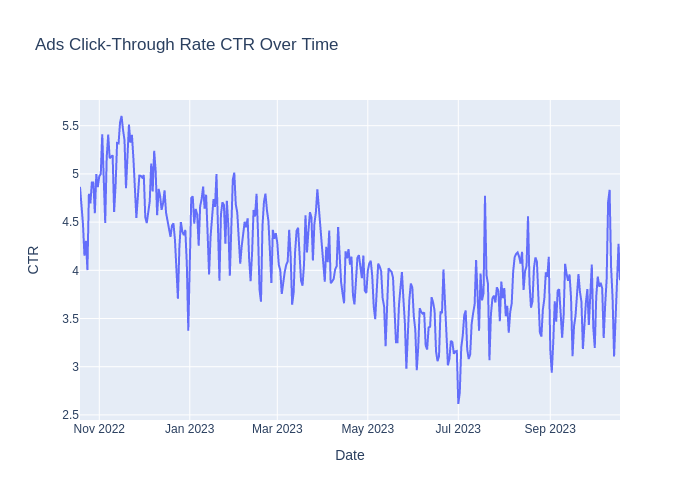

In [30]:
# Calculating CTR
df['CTR'] = df['Clicks'] / df['Impressions'] * 100

# Visualizing CTR over time
fig = px.line(df, x=df.index, y='CTR', title='Ads Click-Through Rate CTR Over Time')
fig.show()

Let's now examine the typical CTR by day of the week

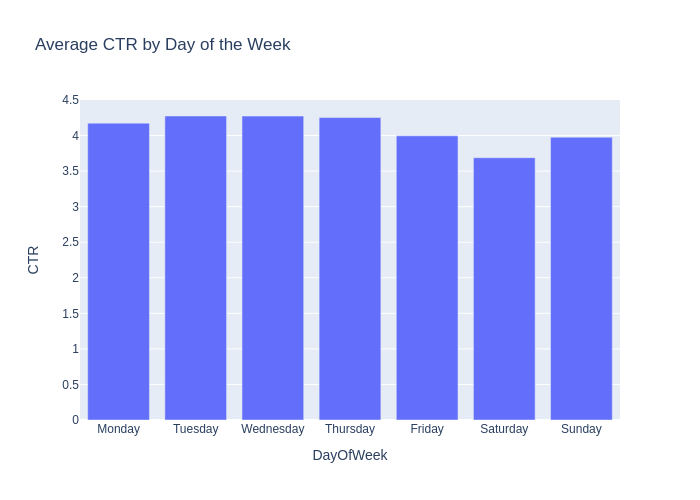

In [31]:
df['DayOfWeek'] = df.index.dayofweek
#df['WeekOfMonth'] = df.index.datetime.week // 4

# EDA based on the day of the week
day_of_week_ctr = df.groupby('DayOfWeek')['CTR'].mean().reset_index()
day_of_week_ctr['DayOfWeek'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


fig = px.bar(day_of_week_ctr, x='DayOfWeek', y='CTR', title='Average CTR by Day of the Week')
fig.show()

Let's now compare the CTR between the weekday and weekend periods.

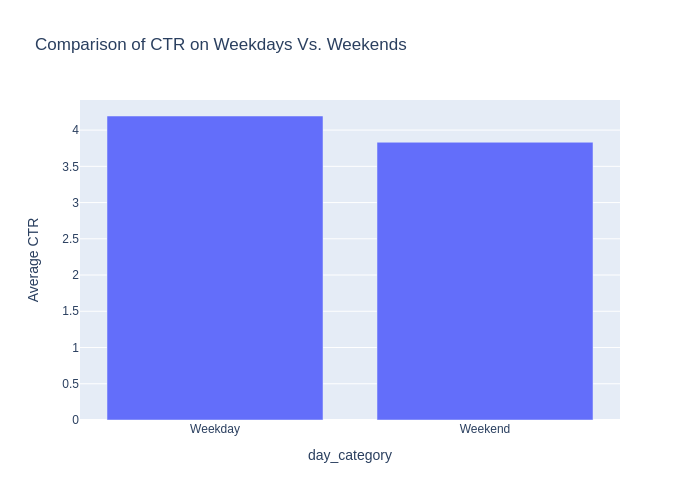

In [32]:
# Create a column called 'DayCategory' to categorize weekdays and weekends
df['day_category'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate average CTR for weekdays and weekends
ctr_by_day_category = df.groupby('day_category')['CTR'].mean().reset_index()

# Create a bar plot to compare CTR on weekdays vs. weekends
fig = px.bar(ctr_by_day_category, x='day_category', y='CTR', title='Comparison of CTR on Weekdays Vs. Weekends',
      labels={'CTR': 'Average CTR'})

# Customize the layout
fig.update_layout(yaxis_title='Average CTR')

# Show the plot
fig.show()


Let's now examine the impressions and clicks received on weekdays versus weekends.

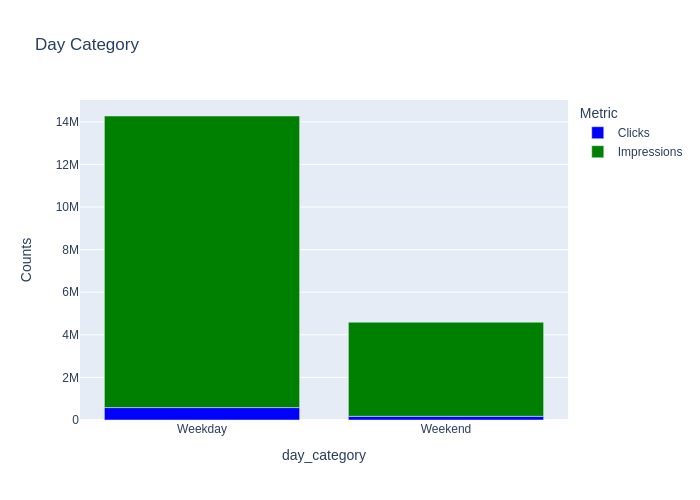

In [33]:
# Group the data by 'day_category' and calculate the sum of clicks and impressions for each category
grouped_df = df.groupby('day_category')[['Clicks', 'Impressions']].sum().reset_index()

# Create a grouped bar chart to visualize clicks and impressions on weekday
fig = px.bar(grouped_df, x='day_category', y=['Clicks', 'Impressions'],
             title='Impressions and Clicks on Weekdays Vs. Weekends',
             labels={'value': 'Counts', 'variable': 'Metric'},
             color_discrete_sequence=['blue', 'green'])

# Customize the layout
fig.update_layout(yaxis_title='Counts')
fig.update_layout(title_text='Day Category')

# Show the plot
fig.show()

We can see that from the bar plots above, the CTR is high during the week then on weekends.

<a id="six"></a>
## 5. Forecasting
<a class="anchor" id="1.1"></a>

Let's now examine how to predict the CTR for ads. Since CTR is reliant on impressions, which fluctuate over time, we can forecast CTR using Time Series forecasting techniques. Let's compute the p, d, and q values for the SARIMA model since the CTR is seasonal.

<a href=#cont>Back to Table of Contents</a>

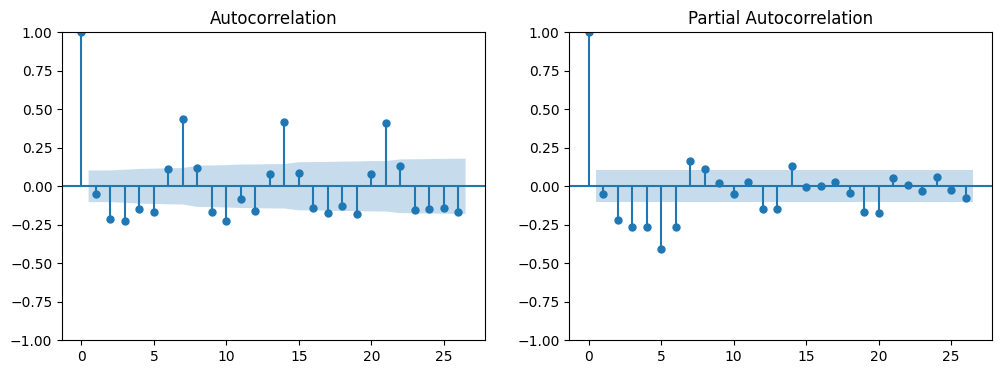

In [34]:
df.reset_index(inplace=True)

# resetting index
time_series = df.set_index('Date')['CTR']

# Differencing
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()


Looking at the above plots, we can deduce that the value of p, d, q is one and since we will be using the SARIMAX models, the value of s will be 12. Now, let's train the forecasting model using SARIMAX.

In [35]:
p, d, q, s = 1, 1, 1, 12

model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(p, d, q, s))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CTR   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -71.365
Date:                            Tue, 02 Jul 2024   AIC                            152.730
Time:                                    08:59:53   BIC                            172.048
Sample:                                10-19-2022   HQIC                           160.418
                                     - 10-18-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5266      0.070      7.513      0.000       0.389       0.664
ma.L1         -0.9049      0.036   

Now, let's predict future CTR values.

In [36]:
# Predict future values
future_steps = 50
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
print(predictions)

2023-10-19    3.852350
2023-10-20    3.889426
2023-10-21    3.820260
2023-10-22    3.727494
2023-10-23    3.710360
2023-10-24    3.734107
2023-10-25    3.769865
2023-10-26    3.820962
2023-10-27    3.724496
2023-10-28    3.724354
2023-10-29    3.753436
2023-10-30    3.770368
2023-10-31    3.686238
2023-11-01    3.789813
2023-11-02    3.783910
2023-11-03    3.837192
2023-11-04    3.844769
2023-11-05    3.740001
2023-11-06    3.721058
2023-11-07    3.668909
2023-11-08    3.654198
2023-11-09    3.711893
2023-11-10    3.796162
2023-11-11    3.751182
2023-11-12    3.673074
2023-11-13    3.766199
2023-11-14    3.750351
2023-11-15    3.780666
2023-11-16    3.784358
2023-11-17    3.699803
2023-11-18    3.689463
2023-11-19    3.653552
2023-11-20    3.625983
2023-11-21    3.674582
2023-11-22    3.750172
2023-11-23    3.714929
2023-11-24    3.635874
2023-11-25    3.730642
2023-11-26    3.716358
2023-11-27    3.750285
2023-11-28    3.754588
2023-11-29    3.666854
2023-11-30    3.655161
2023-12-01 

Let's now visualize the predicted CTR trend.

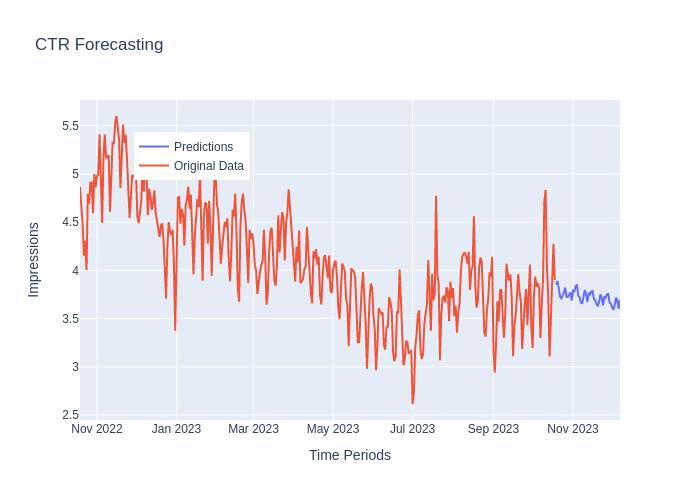

In [37]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='CTR Forecasting',
                  xaxis_title='Time Periods',
                  yaxis_title='Impressions',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

<a id="eight"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this project, we have successfully implemented a Click-Through Rate (CTR) forecasting model using the Seasonal AutoRegressive Integrated Moving Average with Exogenous Variables (SARIMAX) method. The primary objective was to predict the future CTR of online advertisements, enabling better campaign optimization, budget allocation, and performance evaluation.